<a href="https://colab.research.google.com/github/ntr262003/Infosys_Stroke_Patient_Healthcare/blob/main/Milestonee4_Tulasiram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Data Exploration on Stroke Patient Healthcare data set**






**Dataset Description**

The dataset contains healthcare data related to strokes. It consists of 5110 records and 12 columns. The columns include patient demographic information, health metrics, and whether they have experienced a stroke.

**Dataset**
The dataset provided consists the list of patients and their healthcare related data:



*   id: Unique identifier for each patient
*   gender: Gender of the patient
*   age: Age of the patient
*   hypertension: 0 = No, 1 = Yes
*   heart_disease: 0 = No, 1 = Yes
*   ever_married: Marital status
*   work_type: Type of employment
*   Residence_type: Urban or Rural
*   avg_glucose_level: Average glucose level in blood
*   bmi: Body Mass Index
*   smoking_status: Smoking habits (never smoked, formerly smoked, etc.)
*   stroke: 1 if the patient had a stroke, 0 otherwise


###**(1) Defining Problem Statement and Analyzing Basic Metrics**

The goal is to develop a predictive model to determine whether a patient is at risk of having a stroke based on their demographic details, medical history, and lifestyle factors. By analyzing features such as age, hypertension, heart disease, BMI, glucose levels, and smoking status, we aim to identify patterns that indicate the likelihood of stroke occurrence. Accurate prediction can help in early intervention and medical decision-making to reduce stroke risks.

###  **(2) Import libraries and Loading the dataset**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#To ignore the warnings and make code more representable
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load the healthcare.csv dataset into dataframe
df=pd.read_csv("https://drive.google.com/uc?export=download&id=1XyhVIZaKYZczlM2alun_fofilqTBq_9c")

In [3]:
#show the top 5 records of dataset
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# **Data Exploration and Pre-Processing**


### **Check basic metrics and data types**

Understanding the structure of the dataset, including the number of rows and columns, and the data types of each attribute. It is a crucial step in **data exploration.**

In [4]:
df.shape

(5110, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


**Observations:**



*   The dataset contains 5110 rows and 12 columns
*   We can columns like "gender", "ever_married", "work_type", "residence_type" and "smoking_status" contain string values, which are represented using the "object" datatype in this dataframe
*   The columns like "age", "avg_glucose_level", "bmi" to be of float datatype
*   The columns like "id", "heart_disease", "hypertension", "stroke" to be of int datatype







In [6]:
# Describing the statistical summary of the numerical type data
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


**Observations:**


*   Demographics: The average age of participants is 43 years, with a wide age range from 0.08 to 82 years, indicating a diverse population.
*   Health Conditions: Approximately 10% of participants have hypertension, while heart disease prevalence is around 5%, suggesting a relatively low incidence of these chronic conditions.
*   Stroke Incidence: Stroke occurrence is low at about 4.9%, indicating that the majority of participants have not experienced a stroke, reflecting overall good health in the population.






In [7]:
# Statistical summary of categorical type data
df.describe(include='object')

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892




*   Gender Distribution: The dataset consists of a majority of females, with 2,994 female participants compared to 2,116 males.
*   Marital Status: Most participants (approximately 65.6%) have ever been married, indicating a higher prevalence of marriage among the population.
*   Work Type: The most common work type is Private employment, with 2,925 individuals, reflecting a trend towards urban employment sectors.
*   Smoking Status: A significant portion of the population (approximately 37% or 1,892 participants) reported never smoking, indicating a potential focus on non-smoking individuals in this dataset.



### **Finding Unique Values**



In [8]:
unique_values_example = {col: df[col].nunique() for col in df.columns}
print(unique_values_example)

{'id': 5110, 'gender': 3, 'age': 104, 'hypertension': 2, 'heart_disease': 2, 'ever_married': 2, 'work_type': 5, 'Residence_type': 2, 'avg_glucose_level': 3979, 'bmi': 418, 'smoking_status': 4, 'stroke': 2}






*   We find number of unique values from iterating from each column








In [9]:
unique_values = {col: df[col].unique() for col in df.columns}
print(unique_values)

{'id': array([ 9046, 51676, 31112, ..., 19723, 37544, 44679]), 'gender': array(['Male', 'Female', 'Other'], dtype=object), 'age': array([6.70e+01, 6.10e+01, 8.00e+01, 4.90e+01, 7.90e+01, 8.10e+01,
       7.40e+01, 6.90e+01, 5.90e+01, 7.80e+01, 5.40e+01, 5.00e+01,
       6.40e+01, 7.50e+01, 6.00e+01, 5.70e+01, 7.10e+01, 5.20e+01,
       8.20e+01, 6.50e+01, 5.80e+01, 4.20e+01, 4.80e+01, 7.20e+01,
       6.30e+01, 7.60e+01, 3.90e+01, 7.70e+01, 7.30e+01, 5.60e+01,
       4.50e+01, 7.00e+01, 6.60e+01, 5.10e+01, 4.30e+01, 6.80e+01,
       4.70e+01, 5.30e+01, 3.80e+01, 5.50e+01, 1.32e+00, 4.60e+01,
       3.20e+01, 1.40e+01, 3.00e+00, 8.00e+00, 3.70e+01, 4.00e+01,
       3.50e+01, 2.00e+01, 4.40e+01, 2.50e+01, 2.70e+01, 2.30e+01,
       1.70e+01, 1.30e+01, 4.00e+00, 1.60e+01, 2.20e+01, 3.00e+01,
       2.90e+01, 1.10e+01, 2.10e+01, 1.80e+01, 3.30e+01, 2.40e+01,
       3.40e+01, 3.60e+01, 6.40e-01, 4.10e+01, 8.80e-01, 5.00e+00,
       2.60e+01, 3.10e+01, 7.00e+00, 1.20e+01, 6.20e+01, 2.00e+00,



*   We find all the unique values present in each column by iterating them column by column



#### **Finding Unique Values for columns having categorical type of data**

In [10]:
df.gender.unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [11]:
df.ever_married.unique()

array(['Yes', 'No'], dtype=object)

In [12]:
df.work_type.unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [13]:
df.Residence_type.unique()

array(['Urban', 'Rural'], dtype=object)

In [14]:
df.smoking_status.unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

### **Check for missing values**

This is both a **data cleaning** and **data preprocessing** step. Identifying and handling missing values is considered **data cleaning** since it involves addressing the issue of incomplete data. Depending on the extent of missing data, you may need to decide how to handle it, either by imputing values or removing the affected rows/columns. Additionally, it is also a **data preprocessing** step since having missing values can impact the effectiveness of subsequent analyses, and addressing them helps ensure the data is in a suitable form for analysis.

In [15]:
# Display the count of missing values for each column
df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


In [16]:
# Calculate the missing values percentage for each column and to two decimal places
missing_value_percentage=(df.isnull().mean()*100).round(2)
# Display the missing values percentage for each column
print("Missing Values Percentage:\n")
print(missing_value_percentage)

Missing Values Percentage:

id                   0.00
gender               0.00
age                  0.00
hypertension         0.00
heart_disease        0.00
ever_married         0.00
work_type            0.00
Residence_type       0.00
avg_glucose_level    0.00
bmi                  3.93
smoking_status       0.00
stroke               0.00
dtype: float64


**Observation:**
We can see only column "bmi" has around **3.93 %** of column's values are missing, while rest of the columns do **not** have any **null** values.

### **Handling null values**

In [17]:
#Handling null values for continuous variable
df['bmi'].fillna(0,inplace=True)
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,0.0,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,0.0,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0



**Observation:**
* Filling missing values and replacing them with zero(0).



In [18]:
df['bmi'].fillna(df['bmi'].median())
np.mean(df.bmi)

27.75673189823875

In [19]:
df.fillna(np.mean(df.bmi))

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,0.0,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,0.0,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


**Observation:**


*   Another method is to handle missing value is by computing the **mean** of 'bmi' column and since we have averaged the value, now we replace null values with mean value computed above



In [20]:
round(max(100*df.bmi.isnull()/len(df.bmi)),2)

0.0

**Observation**


*   In the given dataset 0.02 % of values are Null.
Since we have a very small percentage of null values we are dropping them for reducing time in processing them.



In [21]:
df.dropna()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,0.0,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,0.0,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


<h1>Data Visualization on Stroke Patient Healthcare data

<h2>Importing Libraries and loading dataset

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
# df=pd.read_csv("https://drive.google.com/uc?export=download&id=1XyhVIZaKYZczlM2alun_fofilqTBq_9c")


***Q1)What is the age distribution in dataset***



---




***1)We can plot a histogram of "ages" for that***

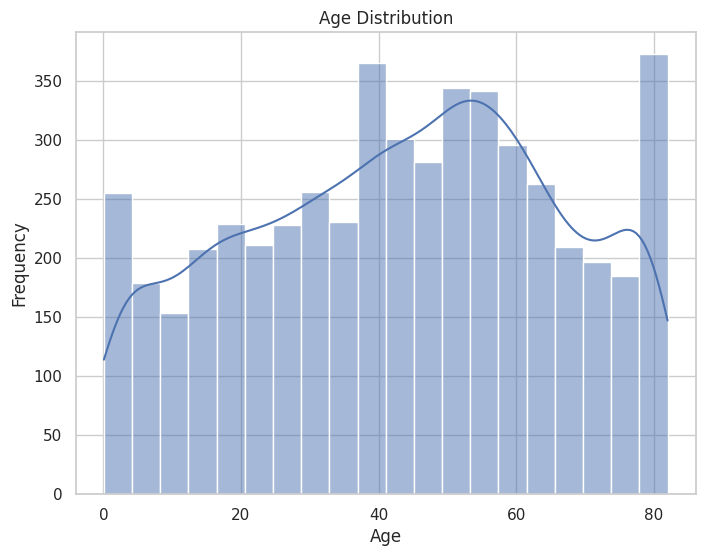

In [23]:
# Set up the plot style
sns.set(style="whitegrid")

# 1. Age Distribution - Histogram
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], bins=20, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

<h3>Observation:</h3>


*   Most people in the dataset are adults, with a high number of individuals aged between 40 and 80.

*   The dataset includes more middle-aged and elderly individuals, which may influence the analysis if age is a significant factor in stroke risk.



***Q2)How does average glucose level vary between people with and without heart disease?***


---

***2)We plot a Boxplot for average glucose level by heart disease status***

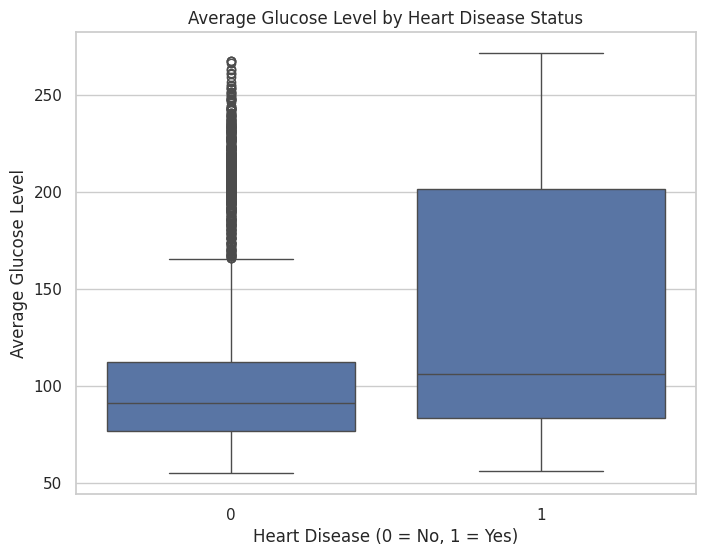

In [24]:
# 2. Average Glucose Level by Heart Disease - Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='heart_disease', y='avg_glucose_level', data=df)
plt.title("Average Glucose Level by Heart Disease Status")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Average Glucose Level")
plt.show()

<h3>Observation:</h3>

*   People with heart disease tend to have a higher median average glucose level than those without heart disease.

*   Elevated glucose levels may be associated with heart disease, indicating that blood sugar control might be crucial for heart health.



***Q3)What is distribution of BMI values?***


---

***3)We plot a histogram of "BMI" for that***

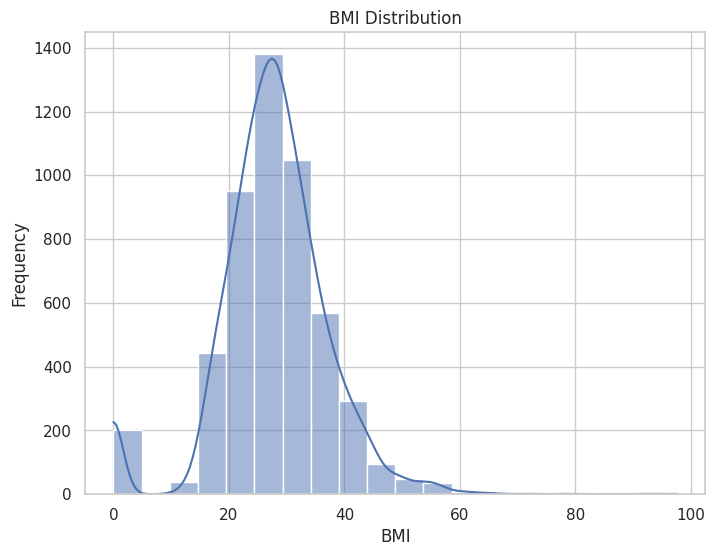

In [25]:
# 3. BMI Distribution - Histogram
plt.figure(figsize=(8, 6))
sns.histplot(df['bmi'].dropna(), bins=20, kde=True)
plt.title("BMI Distribution")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.show()

<h3>Observation:</h3>


*   BMI values are widely distributed, with a concentration of individuals in the 20-35 BMI range.
*   This distribution suggests a range of body types in the population, but with a edge towards higher BMI values, which may reflect varying health risks related to weight.



***Q4)How is the stroke rate affected by smoking status?***


---
***4)We plot a Bar chart of stroke rates by smoking status for that***


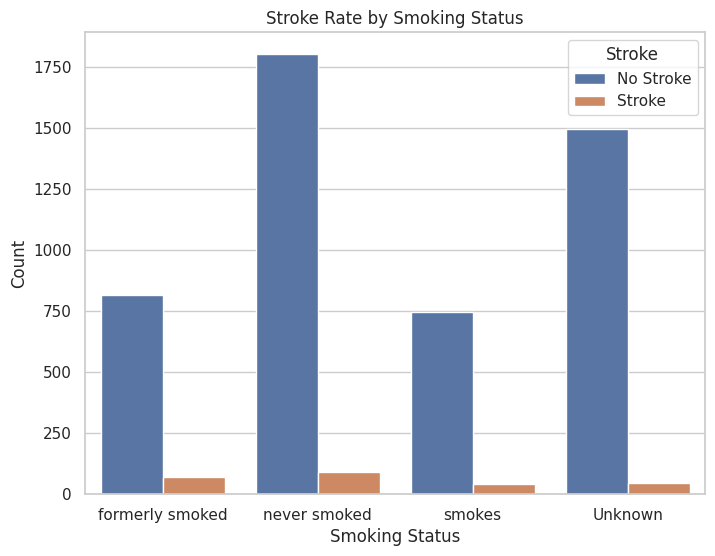

In [26]:
# 4. Stroke Rate by Smoking Status - Bar Chart
plt.figure(figsize=(8, 6))
sns.countplot(x='smoking_status', hue='stroke', data=df)
plt.title("Stroke Rate by Smoking Status")
plt.xlabel("Smoking Status")
plt.ylabel("Count")
plt.legend(title="Stroke", loc="upper right", labels=["No Stroke", "Stroke"])
plt.show()

<h3>Observation:</h3>


*   Individuals who are current or former smokers seem to have a higher stroke rate compared to those who have never smoked.
*   Smoking could be a contributing factor to stroke risk, supporting existing health advice that encourages quitting smoking for better health.



***Q5) What are the correlations among age, BMI, glucose level, and stroke occurrence?***


---

***5)We generate a pairplot for that***

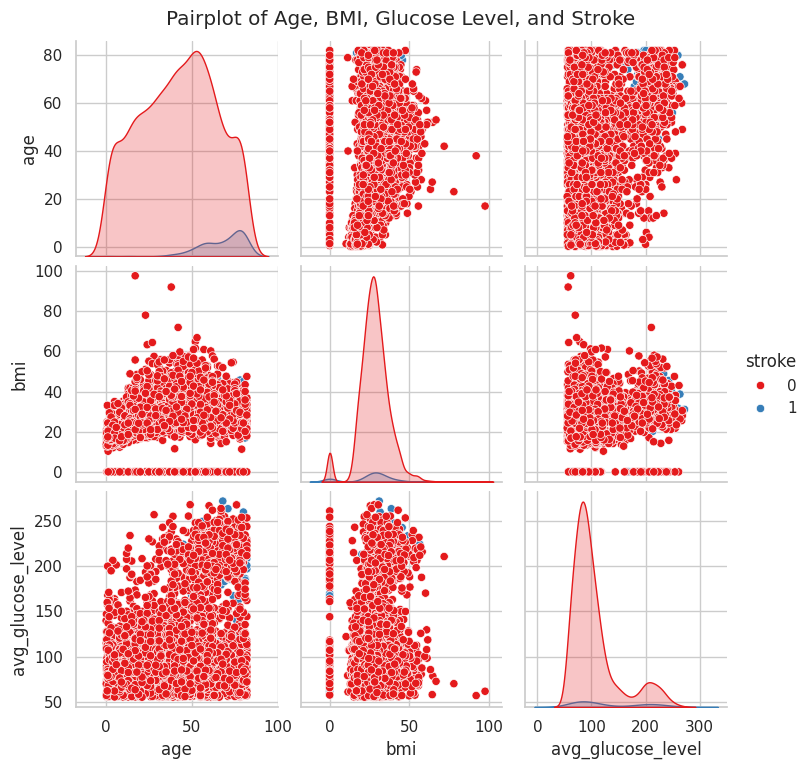

In [27]:
# 5. Pairplot - Age, BMI, Glucose Level, Stroke
sns.pairplot(df[['age', 'bmi', 'avg_glucose_level', 'stroke']].dropna(), hue='stroke', palette="Set1")
plt.suptitle("Pairplot of Age, BMI, Glucose Level, and Stroke", y=1.02)
plt.show()

<h3>Observation:</h3>


*   Age and Stroke: Strokes are more frequent in older individuals, especially those above age 40. This suggests age might be an important factor in stroke risk.
*   BMI and Stroke:  Strokes happen across all BMI levels, so BMI alone doesn’t seem to predict stroke risk well. Both high and low BMI individuals experience strokes.



*   Glucose Level and Stroke: Higher glucose levels, especially above 150, are linked to more stroke cases. This might mean elevated blood sugar increases stroke risk.

*   Overall Distribution: Younger people show fewer strokes, while older groups have more stroke occurrences. This trend highlights that age groups are differently affected by stroke.

*   Key Correlation: Age and glucose level are more associated with stroke risk compared to BMI. Higher age and glucose level might be better indicators of stroke likelihood than BMI alone.








***Q6)How does the distribution of average glucose level vary between individuals with and without stroke?***


---

***6)We generate a Density plot of avg_glucose_level grouped by stroke occurrence***


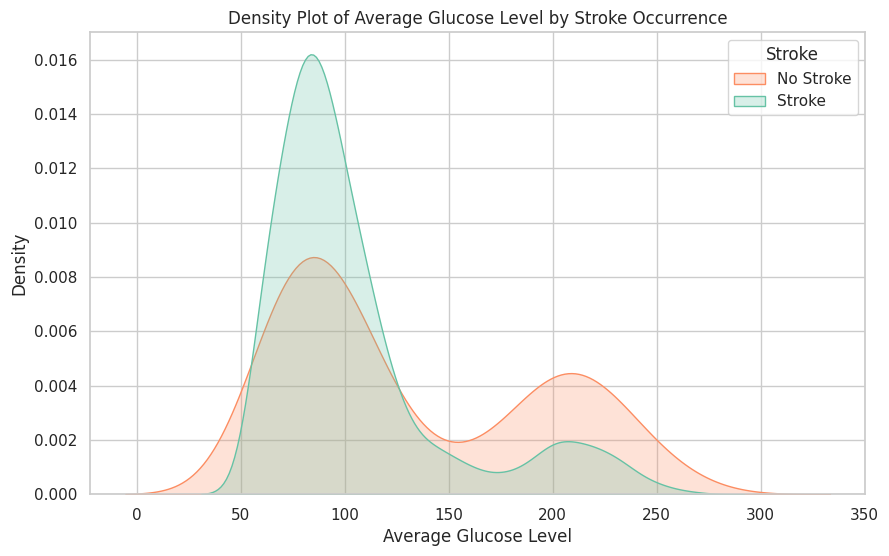

In [28]:
# Density plot for avg_glucose_level based on stroke occurrence
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x="avg_glucose_level", hue="stroke", fill=True, common_norm=False, palette="Set2")
plt.title("Density Plot of Average Glucose Level by Stroke Occurrence")
plt.xlabel("Average Glucose Level")
plt.ylabel("Density")
plt.legend(title="Stroke", labels=["No Stroke", "Stroke"])
plt.show()

<h3>Observation:</h3>


*   Glucose Levels in Stroke and No-Stroke Groups: People without a stroke (orange) mostly have lower glucose levels, around 70-100. People with a stroke (green) tend to have slightly higher glucose levels, peaking around 100, with some even reaching 200-250.
*   Higher Glucose Levels and Stroke: The stroke group has more cases with high glucose levels (above 150). This suggests that higher glucose might be linked to a higher risk of stroke.

*   Overlap in Lower Glucose Levels: Both groups have similar glucose levels in the lower range (70-120), so glucose alone isn’t a perfect predictor for stroke. But higher glucose levels seem to be more common in stroke cases.
*   Overall Inference: People with higher glucose levels may have a higher risk of stroke. Keeping glucose in check could be important for reducing stroke risk, though other factors also matter.





<h1>Data Encoding on Stroke Patient Healthcare Dataset

<h2>Importing Libraries and Dataset

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
# df=pd.read_csv("https://drive.google.com/uc?export=download&id=1XyhVIZaKYZczlM2alun_fofilqTBq_9c")

***1.⁠ ⁠Converting Residence_type column to Rural/Urban column (rural=0, urban=1)***

In [30]:
# Convert 'Residence_type' to 'Urban/Rural' binary column (0 for Rural, 1 for Urban)
df['Urban/Rural'] = df['Residence_type'].apply(lambda x: 1 if x == 'Urban' else 0)
df.head()




,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Urban/Rural
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,0.0,never smoked,1,0
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,0
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,0


<h3>Observation:


---


*** We can clearly see that a new column "Urban/Rural" is created and is in binary form i.e 1 for Urban and 0 for rural***




***⁠ ⁠2. Converting work_type column to 3 or 4 different columns:***


1.   work_type_Never_worked
2.   work_type_Private
3.   work_type_Self-employed






In [31]:
# Use pd.get_dummies to create binary columns for specific work types (0 and 1 format)
work_dummies = pd.get_dummies(df['work_type'], prefix='work_type')

# Select only the columns we need and ensure they are in 0/1 format
df['work_type_Never_worked'] = work_dummies['work_type_Never_worked'].apply(lambda x: 1 if x == 1 else 0)
df['work_type_Private'] = work_dummies['work_type_Private'].apply(lambda x: 1 if x == 1 else 0)
df['work_type_Self-employed'] = work_dummies['work_type_Self-employed'].apply(lambda x: 1 if x == 1 else 0)

# Display the updated DataFrame
df.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Urban/Rural,work_type_Never_worked,work_type_Private,work_type_Self-employed
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,1,0,1,0
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,0.0,never smoked,1,0,0,0,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,0,0,1,0
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,1,0,1,0
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,0,0,0,1


<h3>Observation:

---

***We can clearly see that 3 new columns work_type_Never_worked, work_type_Private, work_type_Self-employed work_type_Never_worked
are created respectively and represented in binary form either 0 or 1, here 1 represent True and 0 represents False***

***3.⁠Convert smoking_status columns to 3 type:***


1.   formerly smoked

2.   never smoked

3.   smokes







In [32]:
# Use pd.get_dummies to create binary columns for specific smoking statuses (0 and 1 format)
smoking_dummies = pd.get_dummies(df['smoking_status'], prefix='smoking_status')

# Select only the columns we need and ensure they are in 0/1 format
df['smoking_status_formerly_smoked'] = smoking_dummies['smoking_status_formerly smoked'].apply(lambda x: 1 if x == 1 else 0)
df['smoking_status_never_smoked'] = smoking_dummies['smoking_status_never smoked'].apply(lambda x: 1 if x == 1 else 0)
df['smoking_status_smokes'] = smoking_dummies['smoking_status_smokes'].apply(lambda x: 1 if x == 1 else 0)

# Display the updated DataFrame
df.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Urban/Rural,work_type_Never_worked,work_type_Private,work_type_Self-employed,smoking_status_formerly_smoked,smoking_status_never_smoked,smoking_status_smokes
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,1,0,1,0,1,0,0
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,0.0,never smoked,1,0,0,0,1,0,1,0
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,0,0,1,0,0,1,0
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,1,0,1,0,0,0,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,0,0,0,1,0,1,0


<h3>Observation:

---
***We can clearly see that 3 new columns smoking_status_formerly_smoked	smoking_status_never_smoked	smoking_status_smokes are created respectively and also in binary format where among three columns 1 represents True and 0 represents False***


<h3>Important Note:
All these columns generated above only have values either 1 or 0


***4.⁠Creating a new variable to store the dataset for data model, and dropping the Residence_type, work_type and smoking_status columns.***

In [33]:
# Create a new variable to store the dataset for the data model
model_data = df.copy()

# Drop the 'Residence_type', 'work_type', and 'smoking_status' columns
model_data.drop(columns=['Residence_type', 'work_type', 'smoking_status'], inplace=True)

# Display the updated dataset to verify the changes
model_data.head()


,id,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,Urban/Rural,work_type_Never_worked,work_type_Private,work_type_Self-employed,smoking_status_formerly_smoked,smoking_status_never_smoked,smoking_status_smokes
0,9046,Male,67.0,0,1,Yes,228.69,36.6,1,1,0,1,0,1,0,0
1,51676,Female,61.0,0,0,Yes,202.21,0.0,1,0,0,0,1,0,1,0
2,31112,Male,80.0,0,1,Yes,105.92,32.5,1,0,0,1,0,0,1,0
3,60182,Female,49.0,0,0,Yes,171.23,34.4,1,1,0,1,0,0,0,1
4,1665,Female,79.0,1,0,Yes,174.12,24.0,1,0,0,0,1,0,1,0


<h3>Observation:

---
***We have created a variable "model_data" to store dataset and further drop Residence_type, work_type and smoking_status columns and displayed them***


<h1>Comparing different ML models on Stroke Patient Healthcare data

<h2> Importing all reaquired Libraries

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import datetime as dt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

<h3>Importing dataset

In [35]:
# df=pd.read_csv("https://drive.google.com/uc?export=download&id=1XyhVIZaKYZczlM2alun_fofilqTBq_9c")

<h3>Handling missing values

In [36]:
# Handling missing values for the 'bmi' column by assigning the result back
df['bmi'] = df['bmi'].fillna(df['bmi'].median())

In [37]:
df['Residence_type'] = df['Residence_type'].apply(lambda x: 1 if x == 'Urban' else 0)
#display(df[['Residence_type']].head())

<h3>Converting Categorical Data into Numerical Data

In [38]:
df['Urban/Rural'] = df['Residence_type'].apply(lambda x: 1 if x == 'Urban' else 0)


df['work_type_Never_worked'] = df['work_type'].apply(lambda x: 1 if x == 'Never_worked' else 0)
df['work_type_Private'] = df['work_type'].apply(lambda x: 1 if x == 'Private' else 0)
df['work_type_Self_employed'] = df['work_type'].apply(lambda x: 1 if x == 'Self-employed' else 0)


df['smoking_status_formerly_smoked'] = df['smoking_status'].apply(lambda x: 1 if x == 'formerly smoked' else 0)
df['smoking_status_never_smoked'] = df['smoking_status'].apply(lambda x: 1 if x == 'never smoked' else 0)
df['smoking_status_smokes'] = df['smoking_status'].apply(lambda x: 1 if x == 'smokes' else 0)

df_model = df.copy()

df_model.drop(['Residence_type', 'work_type', 'smoking_status', 'gender', 'ever_married'], axis=1, inplace=True)

In [39]:
df_model.head(3)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Urban/Rural,work_type_Never_worked,work_type_Private,work_type_Self-employed,smoking_status_formerly_smoked,smoking_status_never_smoked,smoking_status_smokes,work_type_Self_employed
0,9046,67.0,0,1,228.69,36.6,1,0,0,1,0,1,0,0,0
1,51676,61.0,0,0,202.21,0.0,1,0,0,0,1,0,1,0,1
2,31112,80.0,0,1,105.92,32.5,1,0,0,1,0,0,1,0,0


<h3>Preparing data for training

In [40]:
import pandas as pd

# Example: Loading a CSV file into a DataFrame
df=pd.read_csv("https://drive.google.com/uc?export=download&id=1XyhVIZaKYZczlM2alun_fofilqTBq_9c")


<h5><span style="color: #457b9d;">Handling missing values:</span></h5>



In [41]:
df.isnull().sum()            # null values are already handled

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


<h5><span style="color: #457b9d;">Encoding all columns in dataset:</span></h5>

In [42]:
for column in df.columns:
    # Check if column is categorical
    if df[column].dtype == 'object':
        # If it has only two unique values, use binary encoding
        if df[column].nunique() == 2:
            # Map the values directly to 0 and 1
            df[column] = df[column].map({df[column].unique()[0]: 1, df[column].unique()[1]: 0})
        # If it has more than two unique values, use one-hot encoding
        else:
            df = pd.get_dummies(df, columns=[column], drop_first=True)

# Convert any boolean columns to integers (True/False to 1/0)
df = df.applymap(lambda x: int(x) if isinstance(x, bool) else x)

# Check the transformed DataFrame
print("\nEncoded DataFrame:")
print(df.head())



Encoded DataFrame:
      id   age  hypertension  heart_disease  ever_married  Residence_type  \
0   9046  67.0             0              1             1               1   
1  51676  61.0             0              0             1               0   
2  31112  80.0             0              1             1               0   
3  60182  49.0             0              0             1               1   
4   1665  79.0             1              0             1               0   

   avg_glucose_level   bmi  stroke  gender_Male  gender_Other  \
0             228.69  36.6       1            1             0   
1             202.21   NaN       1            0             0   
2             105.92  32.5       1            1             0   
3             171.23  34.4       1            0             0   
4             174.12  24.0       1            0             0   

   work_type_Never_worked  work_type_Private  work_type_Self-employed  \
0                       0                  1         

In [43]:

# Example dataset loading
# df = pd.read_csv("your_dataset.csv")  # Replace with your actual data loading
# Step 1: Data Preparation
df = df.dropna()  # Drop rows with missing values (if any)

X = df.drop(columns='stroke')  # Features
y = df['stroke'].values  # Target variable

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numerical_cols = X.select_dtypes(include=['number']).columns

# Preprocess categorical and numerical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),  # Scale numerical features
        ('cat', OneHotEncoder(drop='first'), categorical_cols)  # Encode categorical features
    ]
)

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=54)

# Step 3: Apply preprocessing
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Step 4: Define and train the Ridge Regression model
ridge_model = Ridge(alpha=0.5)  # Set alpha (regularization strength)
ridge_model.fit(X_train_processed, y_train)

# Step 5: Make predictions
y_pred = ridge_model.predict(X_test_processed)

# Step 6: Convert predictions to binary classes and calculate accuracy
y_pred_class = (y_pred >= 0.14).astype(int)  # Adjust threshold as needed
accuracy = accuracy_score(y_test, y_pred_class)
print("Accuracy:", accuracy * 100)


Accuracy: 90.93686354378818


<h3>Observation</h3>


*   The data is split into features (X) and the target variable (y). X contains the columns that will be used to predict whether a person had a stroke (y).
*   Finally, we split the data into training and test sets, with 80% for training and 20% for testing. This split allows us to train the model and then evaluate it on unseen data.



# Basic Machine Learning Models

- Linear Regression
- Lasso Regression
- Ridge Regression
- Logistic Regression


# Root Mean Square error values (RMSE)
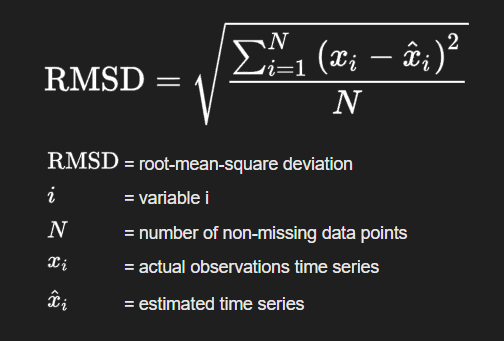

<h3>Training Linear Regression Model

In [73]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Custom Linear Regression class
class LinearRegressionCustom:
    def __init__(self, lr=0.01, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0

        for _ in range(self.n_iters):
            y_pred = np.dot(X, self.weights) + self.bias

            dw = (1 / num_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / num_samples) * np.sum(y_pred - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

# Load dataset and preprocess
df = pd.read_csv("https://drive.google.com/uc?export=download&id=1XyhVIZaKYZczlM2alun_fofilqTBq_9c")
df = df.dropna()

# Encode categorical columns
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Feature and target variable separation
X = df.drop(columns='stroke').values
y = df['stroke'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train linear regression model
linear_model = LinearRegressionCustom(lr=0.01, n_iters=1000)
linear_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = linear_model.predict(X_test_scaled)

# Convert predictions to binary values for classification
y_pred_class = (y_pred >= 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_class)
print("Linear Regression Accuracy:", accuracy * 100)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Linear Regression RMSE:", rmse)


Linear Regression Accuracy: 96.23217922606925
Linear Regression RMSE: 0.18127423108132698


In [74]:
linear_reg = LinearRegression ()
linear_reg.fit(X_train, y_train)
linear_reg_predictions = linear_reg.predict(X_test)
linear_reg_rmse = np.sqrt(mean_squared_error(y_test, linear_reg_predictions))
linear_reg_rmse*100

18.133493746922873

<h3>Observation


*   We train a linear regression model on the training data (X_train and y_train).
*   After training, the model predicts values for the test set.

*   We calculate the root mean square error (RMSE) of these predictions, which tells us how much error there is in our model’s predictions. Lower RMSE values indicate better performance.







<h3>Training Lasso Regression Model

In [75]:
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)
lasso_reg_predictions = lasso_reg.predict(X_test)
lasso_reg_rmse = np.sqrt(mean_squared_error(y_test, lasso_reg_predictions))
print("RSME:",lasso_reg_rmse*100)

RSME: 18.952674831947895


<h3>Observation


*   A lasso regression model is trained and evaluated on the same data as above.

*   Lasso regression is a variation of linear regression that adds a penalty for large coefficients, which can help prevent overfitting.
*   The RMSE is calculated again, giving insight into how well the lasso model predicts.





<h3>Training Ridge Regression Model

In [76]:
Ridge_reg = Ridge()
Ridge_reg.fit(X_train, y_train)
Ridge_reg_predictions = Ridge_reg.predict(X_test)
Ridge_reg_rmse = np.sqrt(mean_squared_error(y_test, Ridge_reg_predictions))
print("RSME:",Ridge_reg_rmse*100)

RSME: 18.13357547573587


<h3>Observation

*   This cell trains a ridge regression model. Ridge regression is another variant of linear regression that also penalizes large coefficients but in a different way from lasso.

*   The model’s RMSE is calculated, which helps us compare its performance against linear and lasso regression.





<h3>Training Logistic Regression Model

In [77]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Custom Logistic Regression class
class LogisticRegressionCustom:
    def __init__(self, lr=0.01, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0

        for _ in range(self.n_iters):
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(linear_model)

            dw = (1 / num_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / num_samples) * np.sum(y_pred - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(linear_model)
        return (y_pred >= 0.5).astype(int)

# Train logistic regression model
logistic_model = LogisticRegressionCustom(lr=0.01, n_iters=1000)
logistic_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = logistic_model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy * 100)
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("RMSE:", rmse)


Logistic Regression Accuracy: 96.23217922606925
RMSE: 0.19410875235111769


In [78]:
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)
logistic_reg_predictions = logistic_reg.predict(X_test)
logistic_reg_rmse = np.sqrt(mean_squared_error(y_test, logistic_reg_predictions))
print("RSME:",logistic_reg_rmse*100)

RSME: 19.410875235111767


<h3>Observation


*   A logistic regression model is trained on the data. Unlike the previous regression models, logistic regression is generally used for classification (predicting categories rather than continuous values).

*   Here, we’re calculating RMSE for consistency, but typically, accuracy is a better measure for classification models.







# Accuracy score

In [79]:
accuracy_logistic = np.mean((logistic_reg_predictions.round() == y_test))
print("Logistic Regression Accuracy :", accuracy_logistic*100)

Logistic Regression Accuracy : 96.23217922606925


<h3>Observation


*   This calculates the accuracy of the classification model (e.g., Logistic Regression) on the test data




In [80]:
Ridge_reg.score(X_test, y_test)*100

9.310641156508847

<h3>Observation


*   This calculates the performance of the Ridge Regression model.



In [81]:
lasso_reg.score(X_test, y_test)*100

0.9326682266678765

<h3>Observation

*   Similar to Ridge Regression, this computes the performance of the Lasso Regression model.



In [82]:
linear_reg.score(X_test, y_test)*100

9.311458636432357

<h3>Observation

*   This calculates the performance of the Linear Regression model.



#Plotting Graphs to show Accuracy and RMSE

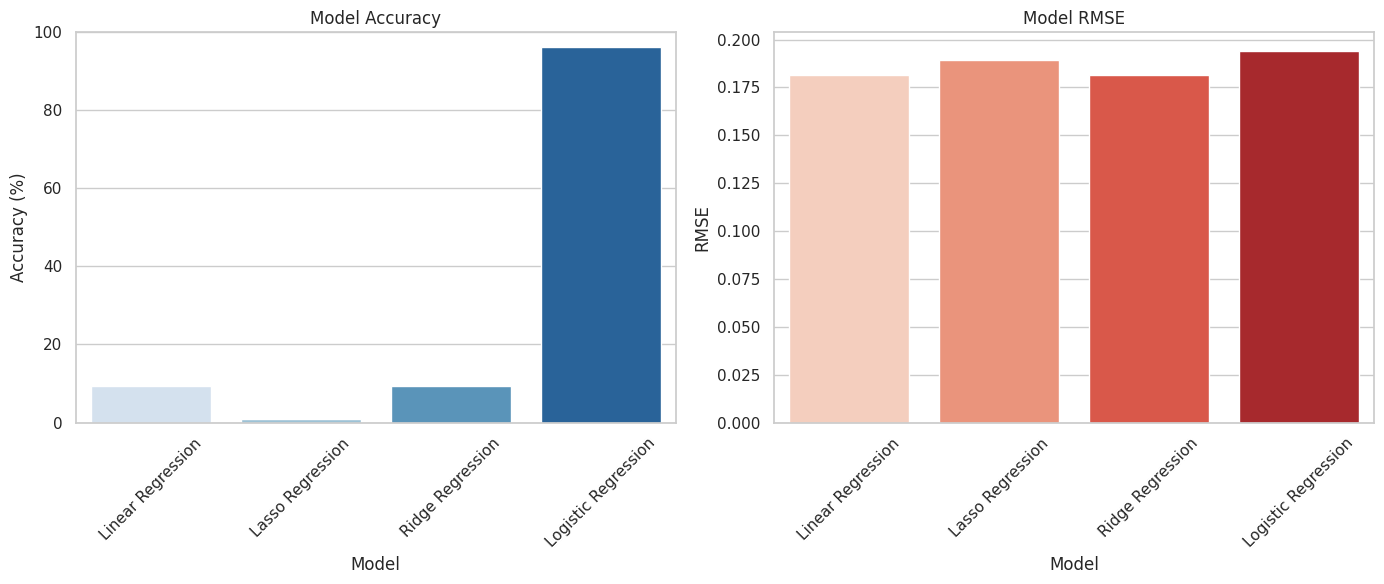

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

# Defining model names and corresponding RMSE and accuracy scores
model_names = ['Linear Regression', 'Lasso Regression', 'Ridge Regression', 'Logistic Regression']

# RMSE scores from the models
rmse_scores = [linear_reg_rmse, lasso_reg_rmse, Ridge_reg_rmse, logistic_reg_rmse]

# Accuracy scores from the models
accuracy_scores = [
    linear_reg.score(X_test, y_test)*100,
    lasso_reg.score(X_test, y_test)*100,
    Ridge_reg.score(X_test, y_test)*100,
    accuracy_logistic * 100
]

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Accuracy plot
sns.barplot(x=model_names, y=accuracy_scores, ax=ax1, palette='Blues')
ax1.set_title('Model Accuracy')
ax1.set_xlabel('Model')
ax1.set_ylabel('Accuracy (%)')
ax1.set_ylim(0, 100)  # Setting y-axis limit from 0 to 100 for consistency

# RMSE plot
sns.barplot(x=model_names, y=rmse_scores, ax=ax2, palette='Reds')
ax2.set_title('Model RMSE')
ax2.set_xlabel('Model')
ax2.set_ylabel('RMSE')

# Rotating x labels for better readability
for ax in [ax1, ax2]:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()




<h3>Observation</h3>

<h3>Model Accuracy(Left Chart)</h3>


*   Logistic Regression achieves the highest accuracy, close to 94%, meaning it consistently makes correct predictions for this dataset.
*   Linear Regression, Lasso Regression, and Ridge Regression have very low accuracy scores, indicating they struggle to classify outcomes correctly.


*   The significant difference highlights that Logistic Regression is much better suited for classification tasks in this healthcare dataset.

<h3>Model RMSE(Right Chart)</h3>


*   The RMSE values for all models are close, around 0.25, showing similar levels of average prediction error.

*   A lower RMSE typically indicates better predictions.



*   Here Linear Regression has slightly lower RMSE score as  it is specifically designed to minimize errors in continuous predictions by finding the line of best fit.








---



#Why certain models have good accuracy and other's don't?

<h3>Different Models for Different Tasks:</h3>


*   Logistic Regression is designed for classification problems, where you predict categories (like "yes" or "no"), such as whether someone had a stroke or not.
*   Linear Regression, Ridge, and Lasso are designed for predicting continuous values (like age or temperature) and are better suited for regression tasks.

<h3>Why Logistic Regression is Better for Classification:</h3>


*   Logistic Regression works well on binary classification tasks (two outcomes), so it gives high accuracy for problems like predicting stroke vs. no stroke.

<h3>Limitations of Regression Models:</h3>

*   Models like Linear, Ridge, and Lasso try to predict numbers and fit a line to minimize errors, but they struggle with classification tasks because they aren’t designed for categories.

<h3>RMSE and Accuracy:</h3>

*   Linear Regression may have a slightly lower RMSE, but that doesn’t mean it’s better for classification. RMSE measures errors for continuous data, not for categorizing outcomes.
*  For classification tasks, accuracy is a more important measure than RMSE. Even with lower RMSE, Linear Regression isn’t the best choice for predicting categories.




#Generating a Confusion Matrix graph

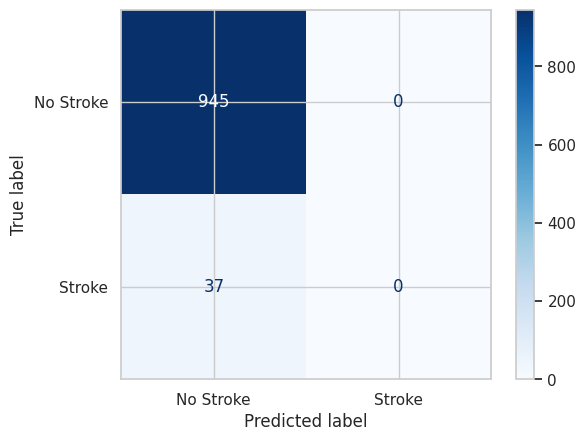

In [55]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_class)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["No Stroke", "Stroke"])
disp.plot(cmap='Blues')

In [56]:
tp = conf_matrix[0][0] #True Positive
fn = conf_matrix[0][1] #False Negative
fp = conf_matrix[1][0] #False Positive
tn = conf_matrix[1][1] #True Negative

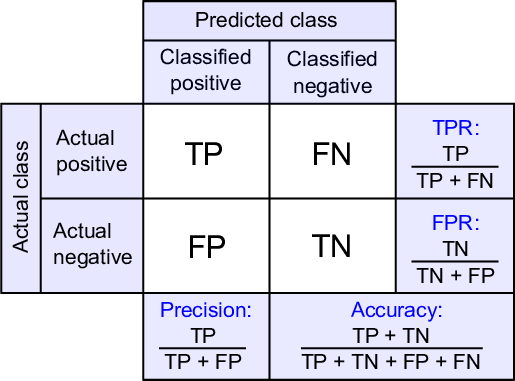

#Finding various scores on Stroke Patient Healthcare Dataset

In [57]:
X = df_model.drop('stroke', axis=1) # independent variable
y = df_model['stroke'] # Dependent variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)
X_train

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,Urban/Rural,work_type_Never_worked,work_type_Private,work_type_Self-employed,smoking_status_formerly_smoked,smoking_status_never_smoked,smoking_status_smokes,work_type_Self_employed
1972,65697,39.0,0,0,122.91,35.7,0,0,1,0,0,1,0,0
1711,12512,52.0,1,0,213.54,32.0,0,0,1,0,0,1,0,0
3273,42330,48.0,0,0,73.56,27.1,0,0,1,0,0,0,1,0
4416,65729,26.0,0,0,123.98,30.1,0,0,1,0,0,1,0,0
4587,68060,4.0,0,0,81.33,18.6,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3633,7403,51.0,0,0,83.52,34.3,0,0,1,0,0,0,0,0
439,58600,65.0,1,0,112.09,29.5,0,0,1,0,0,1,0,0
1626,35829,33.0,0,0,242.84,15.7,0,0,1,0,0,0,1,0
2667,39042,2.0,0,0,70.93,20.3,0,0,0,0,0,0,0,0


In [58]:
clf=LogisticRegression()
clf.fit(X_train, y_train)
Logistic_pred = clf.predict(X_test)
Log_reg_rmse = np.sqrt(mean_squared_error(y_test, Logistic_pred))
Log_reg_rmse*100

20.74917771223369

In [59]:
clf.score(X_test, y_test)*100

95.69471624266144

<h1>F1 score</h1>
<h4>F1 Score is the harmonic mean of Precision and Recall.<h4>

*   Strength: Useful for imbalanced datasets where optimizing both Precision and Recall is necessary.

*   Weakness: Doesn't consider TN; focuses on positive class performance.





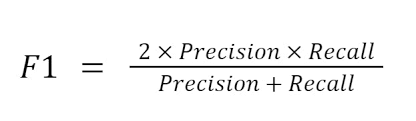


In [60]:
from sklearn.metrics import f1_score

f1_score(y_test, Logistic_pred)

0.15384615384615385

<h1>Precision<h1>
<h4>Precision evaluates the proportion of true positive predictions out of all positive predictions.</h4>



*  High Precision: Few false positives, which is crucial in applications where false alarms are costly (e.g disease diagnosis).

*   Low Precision: Many false positives, indicating overprediction of the positive class.



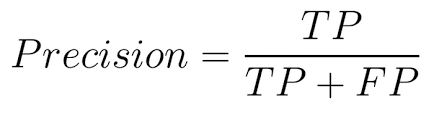

In [61]:
from sklearn.metrics import precision_score

precision_score(y_test, Logistic_pred)

0.5

<h1>Recall</h1>
<h4>Recall measures the proportion of actual positive cases correctly identified by the model.</h4>


*   High Recall: Few false negatives, essential in applications where missing positive cases is critical (e.g detecting strokes).


*   Low Recall: Many false negatives, meaning the model misses true cases.



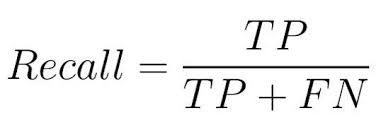

In [62]:
from sklearn.metrics import recall_score
recall_score(y_test, Logistic_pred)

0.09090909090909091

<h2>Performance of Logistic Regression Model</h2>
<h3>Strength</h3>


*   **Simplicity and interpretability:** Logistic regression is effective for linear relationships, and the trained model can explain the impact of features on predictions.
*   Precision, Recall, and F1 scores indicate how well the model balances false positives and false negatives.

<h3>Weakness</h3>


*   **Handling non-linearity:** Logistic regression is not ideal for non-linear relationships between features and the target variable.

*   **Performance on imbalanced datasets:** Logistic regression may underperform when the dataset has a class imbalance.





In [63]:
from sklearn.metrics import precision_recall_curve

In [64]:
precision, recall, thresholds = precision_recall_curve(y_test, Logistic_pred)
thresholds

array([0, 1])

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
from sklearn.datasets import make_classification

# Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and fit the model
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)


LogisticRegression(random_state=42)

In [66]:
# Get predicted probabilities for the positive class
Logistic_pred = clf.predict_proba(X_test)[:, 1]

# Compute precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, Logistic_pred)

print("Thresholds:", thresholds)


Thresholds: [6.15544334e-05 7.09363229e-04 9.86656699e-04 1.68434810e-03
 2.25507805e-03 2.70953576e-03 3.24578924e-03 3.54102026e-03
 4.08948143e-03 4.51196086e-03 5.41306342e-03 5.66845389e-03
 6.69050831e-03 9.13342692e-03 1.00222414e-02 1.14111255e-02
 1.18188476e-02 1.40254223e-02 1.45131996e-02 1.46803799e-02
 1.49381139e-02 1.52129070e-02 1.57365810e-02 1.61437870e-02
 1.62678261e-02 1.83580744e-02 1.86227131e-02 1.87815387e-02
 2.20139232e-02 2.62336707e-02 3.01279958e-02 3.28958636e-02
 3.54892498e-02 3.57063485e-02 3.59937247e-02 3.76714384e-02
 3.85030441e-02 3.86605541e-02 3.91322515e-02 4.34950675e-02
 4.43194698e-02 4.55256562e-02 4.62086868e-02 4.78677157e-02
 4.91548013e-02 4.94152715e-02 4.95031133e-02 4.95158620e-02
 5.14401674e-02 5.19867342e-02 5.23451932e-02 5.25378260e-02
 5.46282715e-02 5.50338834e-02 5.57726753e-02 5.97147719e-02
 5.99608153e-02 6.13756782e-02 6.18897646e-02 6.44589971e-02
 6.56006598e-02 6.57812599e-02 6.79806651e-02 7.00945658e-02
 7.01253980e

Text(0.5, 1.0, '2-class Precision-Recall curve')

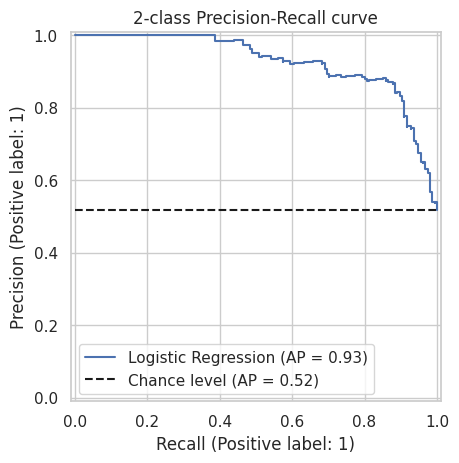

In [67]:
# Using from_estimator (requires a fitted model)
display = PrecisionRecallDisplay.from_estimator(
    clf, X_test, y_test, name="Logistic Regression", plot_chance_level=True)
display.ax_.set_title("2-class Precision-Recall curve")

<h1>Ideal Precision Recall graph

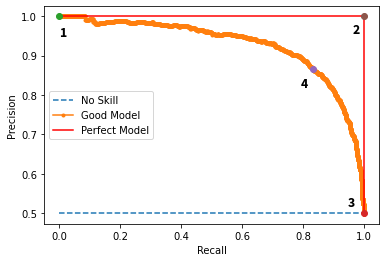

#Evaluating scores from Decision Tree

In [68]:
from sklearn import tree
model1=tree.DecisionTreeClassifier()
model1.fit(X_train, y_train)
tree_pred = model1.predict(X_test)
model1.score(X_test, y_test)

0.8466666666666667

In [69]:
f1_score(y_test, tree_pred)

0.847682119205298

In [70]:
precision_score(y_test, tree_pred)

0.8707482993197279

In [71]:
recall_score(y_test,tree_pred)

0.8258064516129032

<h2>Dataset:</h2>
<h3>Bias in Dataset</h3>


1.   Class Imbalance:

*   The dataset has a high bias towards non-stroke cases, which could lead to models being overly confident in predicting the majority class.




2.   Demographic Bias:


*   Features like gender, age, and smoking_status may have unequal representation or influence, which might affect fairness.


3.  Data Gaps:


*   Missing bmi values could introduce bias if not handled properly.

<h3>Tackling Bias</h3>


1.  Handling Class Imbalance:


*   Undersampling: Randomly remove samples from the majority class to balance the dataset.




2.   Addressing Missing Data:
*   Use imputation strategies (e.g., mean, median, or regression imputation) to fill missing bmi values.
3.   Evaluation Metrics:
*   Use metrics like F1-score, precision-recall curves, to assess the model's performance














---



<h2>Recommendations</h2>


1.   Address Class Imbalance:


*   Use techniques like oversampling or class weight adjustments in the model to improve the detection of minority class




2.   Focus on Recall Improvement:
*   Prioritize recall in stroke detection to minimize false negatives.
3.   Evaluate with Multiple Metrics:
*   Use F1 Score, Precision, Recall, and AUC-PR instead of solely relying on accuracy to assess the model's effectiveness.




